# An Introduction to Regression in Python

In this tutorial we will cover regression, starting from the basics to a few advanced features.  This tutorial will focus on classical and statistical rigourous methods.  We will make use of statistical tests throughout.

## Material

* Definition of a Statistical Model
* Maximum Likelihood Estimation - A Review
    * Ratios
    * percentages
    * point estimation
    * pre-bayesian analysis
* Linear Regression
    * the OLS algorithm
        * newton's method
        * stochastic gradient descent
    * Parameter testing
        * t-tests
        * f-tests
    * Goodness of fit measures
        * KL-Divergence
        * AIC
        * BIC
        * R^2
        * Mean Squared Error
        * Mean Absolute Error
    * Parameter Interpretation
        * linear - linear model
        * log - linear model
        * linear - log model
        * log - log model
        * linear - exponential model
* Generalized Least Squares
    * Distributions - digression (as a model)
        * gaussian
        * poisson
        * gamma
        * binomial
        * inverse gaussian
        * negative binomial
    * Parameter testing
        * ks 2 sample test (non parametric t-test)
        * Kruskal-Wallis (non parametric F-test)
    * Goodness of fit
        * Mean Squared Error
        * Mean Absolute Error
    * Parameter Interpretation
        * gaussian 
        * poisson
        * gamma
        * binomial
        * inverse gaussian
        * negative binomial
* Hierarchical Data
    * groupby - digression
    * fixed effects model
        * parameter testing
        * goodness of fit
        * parameter interpretation
    * mixed effects model
        * parameter testing
        * goodness of fit
        * parameter interpretation
* Regularization
    * distance functions - digression
        * triangle inequality
        * euclidean distance
        * manhattan distance
    * L1 regularization with OLS
    * L2 regularization with OLS
    * Lasso Regression
    * Ridge Regression
    * ElasticNet Regression

https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html

http://datacognizant.com/index.php/ml-algorithms-decoded/

http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

http://www.stat.tamu.edu/~twehrly/611/distab.pdf


# Defining a Statistical Model

In the most general sense, the goal of statistics is understand the world around us.  Often times, to do this, we come up with a mental model of the world, from data.  If our data is of a high quality and is an accurate reflection of the world around us, the model we come up with can possibly be an accurate reflection of the world, rather than meaningless symbols or "just notation".  

With a well informed model, we can simulate the underlying phenomenon we captured data on, either extrapolating into the future what might happen in the real world, understanding what's happening now, even if we can't directly observe it, or being able to automate away an extremely hard task.  

Statistical models allow us to ask - 

* What if?
* What's happening now?
* Why is it happening?

And actually come up with answers that might be reasonable!  

Additionally, statistical models allow us to automate tasks that appear like science fiction; we can teach robots to simulate processes of cognition like sight, hearing, and speech.  

In order to understand how these models work, we'll need quite a bit of mathematical rigour, but the pay off will be the ability to simulate and understand the world around us through computation.

# Maximum Likelihood Estimation

Before we start introducing statistical models, we need the right mental model of what a statistical model is and does.  For this we turn to maximum likelihood estimation.  You may recall from last time that maximum likelihood estimation can be used to find the shape parameters of a distribution.  Recall that the shape parameters are merely the associated measures of center, spread, skew, kurtosis and higher order terms that allow us to easily define an accurate description of the underlying data through a process that generates data similar to the distribution of values seen.

Realize, that given the above description, we've already seen our first statistical model - the process (or mathematical formula) that generates a distribution of data via sampling.

Let's review with a few examples to see this in action:

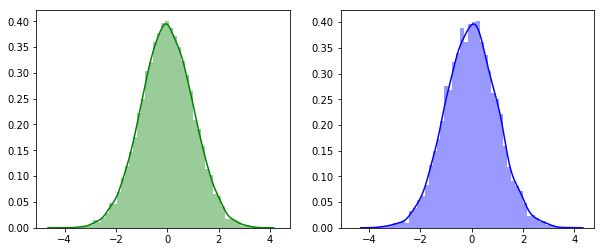

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

data = np.random.normal(0, 1, size=10000)
center, spread = stats.norm.fit(data)
simulated_data = np.random.normal(center, spread, size=10000)

f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( data , color="green", ax=axes[0])
sns.distplot( simulated_data , color="blue", ax=axes[1])
plt.show()

As you can see here there is very little difference between the simulated data and or original source!  This is because we made a few assumptions:

1. we assumed a normal distribution when simulating our data
2. we assumed we had enough original data to come up with reasonable shape parameters

We can even go further to verify that this is the case by overlapping the two distributions:

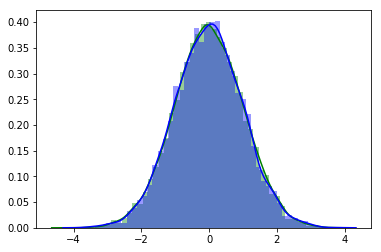

In [7]:
sns.distplot( data , color="green")
sns.distplot( simulated_data , color="blue")
plt.show()

In general, this leads us to a conclusion - we can think of the underlying distribution that our most closely resembles as sort of a mental model for our real world phenomenon.  By understanding the underlying distribution that creates our process, in this case a normal distribution, we can simulate accurate representations of our underlying process, by only knowing the center and spread of the data!

Let's take a real world example:

In [27]:
crashes = sns.load_dataset("car_crashes")
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [24]:
help(stats.normaltest)

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, wh

We first recall the null hypothesis of the test, in this case, the null hypothesis is that the data is normally distributed.

In [28]:
stats.normaltest(crashes["total"])

NormaltestResult(statistic=0.19732083699768993, pvalue=0.9060503337210413)

Next we verify that our data is normally distributed.  With a p-value of 0.906 we fail to reject the null hypothesis somewhat strongly and therfore we can guess the data is likely normally distributed.  Now, let's see if we can generate more data:

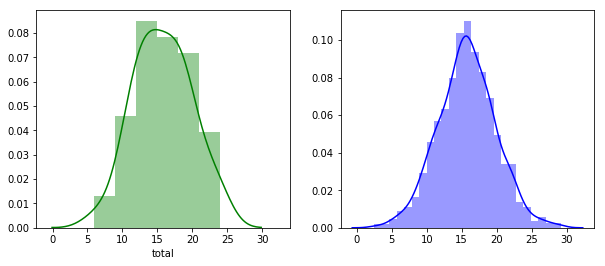

In [33]:
center, spread = stats.norm.fit(crashes["total"])
simulated_crash_totals = np.random.normal(center, spread, size=len(crashes)*20)
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( crashes["total"] , color="green", ax=axes[0])
sns.distplot( simulated_crash_totals , color="blue", ax=axes[1])
plt.show()

As you can see, there isn't an exact match but the center and spread are approximately the same.  This graph shows us, assuming we trust our data, what it would be likely if more countries had car policies and infrastructure similar to the USA with respect to car saftey?  We can see, it would be likely that the maximum number of deaths per billion miles would likely have a high end of around 30 and a low end of close to zero.

Source of data: http://seaborn.pydata.org/examples/horizontal_barplot.html?highlight=car%20crashes

## The Connection Between Likelihood and Probability

Before we leave our high level discussion, there is an important point to make - 

$$ Likelihood(data | \mu, \sigma) \neq Probability(\mu, \sigma | data) $$

This is because with the likelihood we ask, what are the most likely shape parameters that could have generated this data?  With the probability we ask, given these shape parameters what is the probability we saw this data?

So we can think of these as two sides of the same coin for estimation purposes.

Let's see what the probability would look like in python:

Source: https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

In [39]:
def probability(mu, sigma, data):
    simulated_data = np.random.normal(mu, sigma, size=len(data))
    return stats.ttest_ind(simulated_data, data)[1]

data = np.random.normal(0, 1, size=10000)
mu_guess = 0
sigma_guess = 1
probability(mu_guess, sigma_guess, data)
# probability that given these shape parameters we saw this data

0.8624157075606645

# The Problem With Percentages - A Digression

Imagine for a second that you are running on a treadmill.  At the moment you are about 80% done with your first mile.  It took you about 5 minutes to get to this point, how long do you think it would take you to get from 1/5 left to 1/9 left?  

To better conceptualize this question let's look at some pie charts:

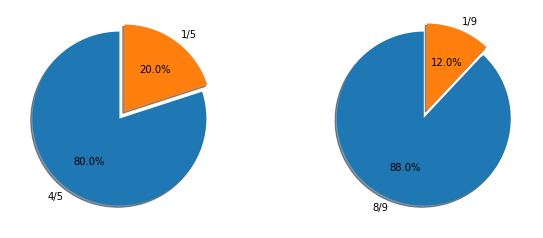

In [44]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '4/5', '1/5', 
sizes = [80, 20]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
axes[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '8/9', '1/9', 
sizes = [88, 12]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()


As you can see, the difference in percentage is about half, but how fast do you think you'd go from 1/5 left to 1/9?  At that given pacing, it takes about 30 seconds and what's more the fraction get smaller exponentially fast with each passing second.  That's because there is increasingly less distance left between you, the runner, and the intended finish line.  But numbers and percentages don't capture this well.  This is because it's hard to reason about asymptotics of a system.

So why do fractions fall apart semantically in this example?  It's because we are trying to capture something precisely with fractions whose components (numerator and denominator) as less than 10!  Do percentages make more sense in this case?  Let's rephrase the question:

Imagine for a second that you are running on a treadmill. At the moment you are about 80% done with your first mile. It took you about 5 minutes to get to this point, how long do you think it would take you to get from 80% left to 88% left?

Does 30 seconds to go 8% of the distance make more sense, then going 1/9 in 30 seconds?  Perhaps it does.  

However there is a larger problem here:

Depending on the units you are talking about 5% or 8% could be a huge amount or a very small amount.  It all comes down to what you are talking about.  For instance, most economists agree a health economy grows at around 2% per year!  This number feels small, until you consider what 2% means for the US economy or other developed nations.

If the US economy grows 2% this year that will mean it grows approximately:

388 billion dollars

We also experience this problem with the rareity of an event:

What is the probability that any of microsoft's servers fails in the next hour given that the probability a given server fails is 0.01%?  

Well that depends on something very important: how many servers do we have?  I personally don't know the exact number but a safe guess in order of magnitude is something like:

$80,000 servers * 8 data centers * 5 availability zones * 24 regions \approx$ 

77 million!!!

We can figure this out by multiplying the probability a server fails times the number of servers:

7700.0

So around 8,000 will fail in the next hour alone!!  I certainly wouldn't have guessed that from the probability of an individual server.

Source: https://www.forbes.com/sites/johnsonpierr/2017/06/15/with-the-public-clouds-of-amazon-microsoft-and-google-big-data-is-the-proverbial-big-deal/#6e5918692ac3

We also experience this problem with floating point numbers in computation.  Because the size of computers are finite, they cannot represent the full precision of values which sometimes means our statistical algorithms don't converge, even when they should theoretically!!

So sometimes, the numbers themselves aren't precise enough for us to do mathematics properly.  

## The Flaw in MLE

The reason I bring all this up, is because of how Maximum Likelihood Estimation is done:

We take an estimate by looking for the choice of shape parameters which maximize the likelihood, but the likelihood is like a probability, it works over a percentage or fraction.  It chooses its parameters by taking a "best" guess.  But the truth is there may be much higher confidence by just taking a small range of values around a desired level of acceptability, rather than insisting on a point estimate that maximizes things.

To understand this, let's look at test scores:

Say we had a class of students and we wanted to choose the folks who did well in the course.  First let's try to pick all those who scored in the top 10% of the class.  And then let's try to pick all those who got 90% or above of the total points available for the course:

In [51]:
scores = np.random.normal(75, 25, size=10000)
scores = scores[scores < 100]

In [55]:
print("Students who scored in the top 10 percentile", len(scores[scores > np.percentile(scores, 90)]))
print("Students who got a score of 90% or better", len(scores[scores >= 90]))

Students who scored in the top 10 percentile 841
Students who got a score of 90% or better 1145


Notice there is an important difference there!  This is because the semantics matter a lot and by picking hard cut offs for what "best" means we limit ourselves slavishly to the misunderstandings of the representations of semantics numerically.

Let's take a closer look at the distribution of scores:

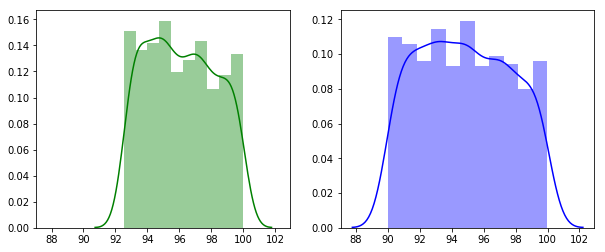

In [56]:
top_10 = scores[scores > np.percentile(scores, 90)]
top_90 = scores[scores > 90]
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( top_10 , color="green", ax=axes[0])
sns.distplot( top_90 , color="blue", ax=axes[1])
plt.show()

With this theoretical example, are the kids on the left "really" any smarter than the kids on the right?  Absolutely not!  And yet some of them would get an A and some of them would get a B based on these cut offs.  

Let's say this were a university course, that might be the difference between getting into graduate school or not, for at least some of these students.  And that's because the semantics of what an A means varies wildly across different universities and different professors.  

To summarize, so this is the issue with point estimates:

Numbers are precise, but humans are not usually and even then, because we are doing math on computers, we lose some precision.  So taking a point estimate may not always give you what you want.  It does okay, but you might miss out on a lot of important stuff.  And if you aren't careful, you could get something very important wrong, which could be highly dependent on your use case.

## How We Can Correct This

One of these easiest ways to do this is to go bayesian.  I won't explain all the theory behind it, but basically bayesians say, instead of taking a point estimate, we take a bunch of points around what we think is a good point estimate.  This allows us to be wrong, allows us to be surprised and most importantly, allows us to still learn things, without throwing out the good stuff.

So if we used a bayesian mindset for the above example, we'd say:

Give me everything around the 90th percentile and give me everything around people that scored 90% percent of the points or better:

In [57]:
print("Students who scored around the top 10 percentile", len(scores[scores > np.percentile(scores, 85)]))
print("Students who got around a score of 90% or better", len(scores[scores >= 85]))

Students who scored around the top 10 percentile 1261
Students who got around a score of 90% or better 1817


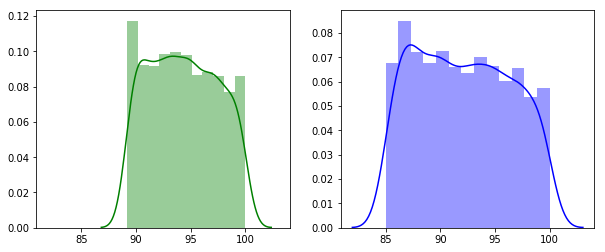

In [58]:
top_10 = scores[scores > np.percentile(scores, 85)]
top_90 = scores[scores > 85]
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( top_10 , color="green", ax=axes[0])
sns.distplot( top_90 , color="blue", ax=axes[1])
plt.show()

So functionally what did we do?  We gave ourselves some slack.  We didn't pick the exact number we were shooting for.  But what does that give us?  Well for instance, by choosing the top 85% we can now see more data and then make an informed choice about individual students that may or may not deserve an A.  Now we can factor in how hard those students at the bottom worked to get that overall score of 85 or to get into the top 85% percentile.  And then we can make a value judgement, based on domain expertise about who deserves an A in the course!

Notice - we lose precision in our point estimate, because now things are more fuzzy.  But!  We gain the ability to be more discerning about our data, our model, and our results.

In the remainder of the lecture, we'll see how point estimates try to account directly for this by looking at the shape parameters of the distribution of errors during training and how this can help inform the models we create!

## References:

* https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

0.5